In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
df=pd.read_csv(r"C:\Users\sumes\OneDrive\Desktop\KAGGLE PROJECT\house-prices-advanced-regression-techniques\train.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [14]:
df.shape

(1460, 81)

In [68]:
df1=df.isnull().sum().apply(lambda x : x if x>700 else 'Non')

In [69]:
df1[df1!='Non']

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: object

In [70]:
df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

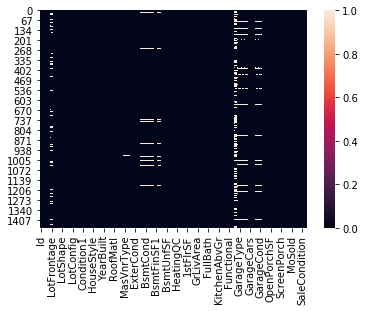

In [71]:
sns.heatmap(df.isnull())

In [156]:
df1=df.isnull().sum().apply(lambda x : x if x>0 else 'Non')

In [157]:
df2=df1[df1!='Non']
df2

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: object

In [152]:
for num in df2.index:
    for col in df.select_dtypes(['object']).columns:
        if num==col:
            df[col]=df[col].fillna(df[col].mode()[0])
            
            
    
    

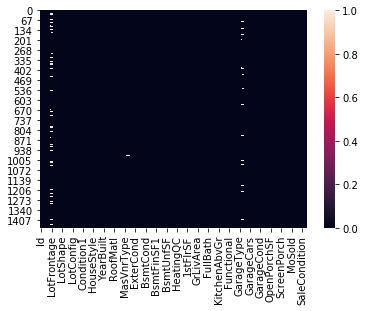

In [153]:
sns.heatmap(df.isnull())

In [171]:
df1=df.isnull().sum().apply(lambda x : x if x>0 else 'Non')
df2=df1[df1!='Non']
df2

Series([], dtype: object)

In [168]:
for num in df2.index:
    df[num]=df[num].fillna(df[num].mean())
    

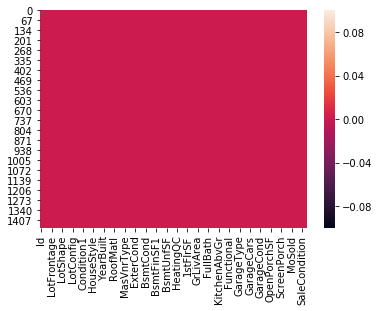

In [170]:
sns.heatmap(df.isnull())

In [172]:
df.shape

(1460, 77)

In [177]:
count=0
for col in df.select_dtypes(['object']).columns:
    count=count+1
print(count)    

39


In [180]:
df_test=pd.read_csv(r"C:\\Users\\sumes\\Downloads\formulated.csv")

In [184]:
df_test.shape

(1459, 76)

In [188]:
df_final=pd.concat([df,df_test],0)

C:\Users\sumes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [189]:
df_final.shape

(2919, 77)

In [194]:
for col in df_final.select_dtypes(['object']).columns:
    temp=pd.get_dummies(df_final[col],prefix=col,drop_first=True)
    df_final=pd.concat([df_final,temp],1)
    df_final.drop([col],1,inplace=True)
    

In [195]:
df_final.shape

(2919, 238)

In [196]:
df_final.head()

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0       856       854          0             3       706.0         0.0   
1      1262         0          0             3       978.0         0.0   
2       920       866          0             3       486.0         0.0   
3       961       756          0             3       216.0         0.0   
4      1145      1053          0             4       655.0         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch        ...         \
0           1.0           0.0      150.0              0        ...          
1           0.0           1.0      284.0              0        ...          
2           1.0           0.0      434.0              0        ...          
3           1.0           0.0      540.0            272        ...          
4           1.0           0.0      490.0              0        ...          

   SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  \
0             0             0               0               0               0   
1             0             0               0               0               0   
2             0             0               0               0               0   
3             0             0               0               0               0   
4             0             0               0               0               0   

   SaleType_New  SaleType_Oth  SaleType_WD  Street_Pave  Utilities_NoSeWa  
0             0             0            1            1                 0  
1             0             0            1            1                 0  
2             0             0            1            1                 0  
3             0             0            1            1                 0  
4             0             0            1            1                 0  

[5 rows x 238 columns]

In [229]:
df_final.head(1461)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0          856       854          0             3       706.0         0.0   
1         1262         0          0             3       978.0         0.0   
2          920       866          0             3       486.0         0.0   
3          961       756          0             3       216.0         0.0   
4         1145      1053          0             4       655.0         0.0   
5          796       566        320             1       732.0         0.0   
6         1694         0          0             3      1369.0         0.0   
7         1107       983          0             3       859.0        32.0   
8         1022       752          0             2         0.0         0.0   
9         1077         0          0             2       851.0         0.0   
10        1040         0          0             3       906.0         0.0   
11        1182      1142          0             4       998.0         0.0   
12         912         0          0             2       737.0         0.0   
13        1494         0          0             3         0.0         0.0   
14        1253         0          0             2       733.0         0.0   
15         854         0          0             2         0.0         0.0   
16        1004         0          0             2       578.0         0.0   
17        1296         0          0             2         0.0         0.0   
18        1114         0          0             3       646.0         0.0   
19        1339         0          0             3       504.0         0.0   
20        1158      1218          0             4         0.0         0.0   
21        1108         0          0             3         0.0         0.0   
22        1795         0          0             3         0.0         0.0   
23        1060         0          0             3       840.0         0.0   
24        1060         0          0             3       188.0       668.0   
25        1600         0          0             3         0.0         0.0   
26         900         0          0             3       234.0       486.0   
27        1704         0          0             3      1218.0         0.0   
28        1600         0          0             2      1277.0         0.0   
29         520         0          0             1         0.0         0.0   
...        ...       ...        ...           ...         ...         ...   
1431       958         0          0             2       958.0         0.0   
1432       968         0          0             4         0.0         0.0   
1433       962       830          0             3         0.0         0.0   
1434      1126         0          0             3       936.0         0.0   
1435      1537         0          0             3         0.0         0.0   
1436       864         0          0             3       616.0         0.0   
1437      1932         0        304             2      1336.0         0.0   
1438      1236         0          0             2       600.0         0.0   
1439      1040       685          0             3       315.0       110.0   
1440      1423       748          0             3         0.0         0.0   
1441       848         0          0             1       697.0         0.0   
1442      1026       981          0             3       765.0         0.0   
1443       952         0          0             2         0.0         0.0   
1444      1422         0          0             3         0.0         0.0   
1445       913         0          0             3       187.0       627.0   
1446      1188         0          0             3       593.0         0.0   
1447      1220       870          0             3      1079.0         0.0   
1448       796       550          0             2         0.0         0.0   
1449       630         0          0             1       553.0         0.0   
1450       896       896          0             4         0.0         0.0   
14

In [217]:
df_final=df_final.loc[:,~df_final.columns.duplicated()]

In [218]:
df_final.shape

(2919, 238)

In [244]:
train_data=df_final.iloc[:1460,:]
train_data.shape

(1460, 238)

In [249]:
test_data=df_final.iloc[1460:,:]
test_data.shape

(1459, 238)

In [251]:
test_data.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\sumes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [252]:
test_data.shape

(1459, 237)

In [254]:
input=train_data.drop(['SalePrice'],axis=1)
output=train_data['SalePrice']

##Prediction and selecting algorithmm

In [288]:
import xgboost
classifier=xgboost.XGBRegressor()


In [289]:
import xgboost
regressor=xgboost.XGBRegressor()


In [290]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [291]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [292]:
# Set up the random search with 4-fold cross validating
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [263]:
random_cv.fit(input,output)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 12.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 26.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'min_child_weight': [1, 2, 3, 4], 'booster': ['gbtree', 'gblinear']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=5)

In [268]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=1100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [270]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=1100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [293]:
regressor.fit(input,output)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [279]:
import pickle
filename='sumesh_model.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [276]:
test_data.head(5)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0       896         0          0             2       468.0       144.0   
1      1329         0          0             3       923.0         0.0   
2       928       701          0             3       791.0         0.0   
3       926       678          0             3       602.0         0.0   
4      1280         0          0             2       263.0         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch        ...         \
0           0.0           0.0      270.0              0        ...          
1           0.0           0.0      406.0              0        ...          
2           0.0           0.0      137.0              0        ...          
3           0.0           0.0      324.0              0        ...          
4           0.0           0.0     1017.0              0        ...          

   SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  \
0             0             0               0               0               0   
1             0             0               0               0               0   
2             0             0               0               0               0   
3             0             0               0               0               0   
4             0             0               0               0               0   

   SaleType_New  SaleType_Oth  SaleType_WD  Street_Pave  Utilities_NoSeWa  
0             0             0            1            1                 0  
1             0             0            1            1                 0  
2             0             0            1            1                 0  
3             0             0            1            1                 0  
4             0             0            1            1                 0  

[5 rows x 237 columns]

In [295]:
y_pred=regressor.predict(test_data)
y_pred

array([125297.86, 154013.69, 184293.17, ..., 173744.06, 106902.82,
       226871.67], dtype=float32)

In [298]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv(r'C:\Users\sumes\OneDrive\Desktop\KAGGLE PROJECT\house-prices-advanced-regression-techniques\sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

In [299]:
pwd

'C:\\Users\\sumes'

In [285]:
sub_df

Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
5     1466  177150.989247
6     1467  172070.659229
7     1468  175110.956520
8     1469  162011.698832
9     1470  160726.247831
10    1471  157933.279456
11    1472  145291.245020
12    1473  159672.017632
13    1474  164167.518302
14    1475  150891.638244
15    1476  179460.965187
16    1477  185034.628914
17    1478  182352.192645
18    1479  183053.458214
19    1480  187823.339254
20    1481  186544.114328
21    1482  158230.775205
22    1483  190552.829321
23    1484  147183.674872
24    1485  185855.300905
25    1486  174350.470677
26    1487  201740.620691
27    1488  162986.378896
28    1489  162330.199086
29    1490  165845.938617
...    ...            ...
1429  2890  160515.850579
1430  2891  192167.621096
1431  2892  178751.551083
1432  2893  198678.894117
1433  2894  164553.120272
1434  2895  156887.932862
1435  2896  164185.777306
1436  2897  212992.120631
1437  2898  197468.550533
1438  2899  180106.843740
1439  2900  183972.071057
1440  2901  245283.198338
1441  2902  170351.963411
1442  2903  195596.307707
1443  2904  189369.756330
1444  2905  223667.404552
1445  2906  169335.310624
1446  2907  167411.028352
1447  2908  187709.555004
1448  2909  196526.002999
1449  2910  137402.569856
1450  2911  165086.775062
1451  2912  188506.431412
1452  2913  172917.456816
1453  2914  166274.325226
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]